# 0.0 - Imports Libraries

In [1]:
import warnings

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from sklearn      import metrics as mt
from sklearn.tree import DecisionTreeRegressor

In [2]:
warnings.filterwarnings('ignore')

# 1.0 - Load Dataset

In [3]:
# Train Dataset 
df_X_train = pd.read_csv( '../dataset/regressao/X_training.csv' )
df_y_train = pd.read_csv( '../dataset/regressao/y_training.csv' )

# Validation Dataset 
df_X_val = pd.read_csv( '../dataset/regressao/X_validation.csv' )
df_y_val = pd.read_csv( '../dataset/regressao/y_val.csv' )

# Validation Dataset 
df_X_test = pd.read_csv( '../dataset/regressao/X_test.csv' )
df_y_test = pd.read_csv( '../dataset/regressao/y_test.csv' )

## 1.1 - Entendendo o Dataset

In [4]:
print(f'O tamanho do conjunto de dados de treinamento é: {df_X_train.shape}')
print(f'O tamanho do conjunto de dados(rótulo) de treinamento é: {df_y_train.shape}')
print(f'---------------------------------------------------------------------')
print(f'O tamanho do conjunto de dados de validação é: {df_X_val.shape}')
print(f'O tamanho do conjunto de dados(rótulo) de validação é: {df_y_val.shape}')
print(f'---------------------------------------------------------------------')
print(f'O tamanho do conjunto de dados de teste é: {df_X_test.shape}')
print(f'O tamanho do conjunto de dados(rótulo) de teste é: {df_y_test.shape}')

O tamanho do conjunto de dados de treinamento é: (10547, 13)
O tamanho do conjunto de dados(rótulo) de treinamento é: (10547, 1)
---------------------------------------------------------------------
O tamanho do conjunto de dados de validação é: (4521, 13)
O tamanho do conjunto de dados(rótulo) de validação é: (4521, 1)
---------------------------------------------------------------------
O tamanho do conjunto de dados de teste é: (3767, 13)
O tamanho do conjunto de dados(rótulo) de teste é: (3767, 1)


In [5]:
df_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10547 entries, 0 to 10546
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  10547 non-null  float64
 1   acousticness      10547 non-null  float64
 2   danceability      10547 non-null  float64
 3   energy            10547 non-null  float64
 4   instrumentalness  10547 non-null  float64
 5   key               10547 non-null  float64
 6   liveness          10547 non-null  float64
 7   loudness          10547 non-null  float64
 8   audio_mode        10547 non-null  int64  
 9   speechiness       10547 non-null  float64
 10  tempo             10547 non-null  float64
 11  time_signature    10547 non-null  float64
 12  audio_valence     10547 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [6]:
df_X_train.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
song_duration_ms,10547.0,0.000,1.000,-3.554,-0.581,-0.115,0.422,19.691
acousticness,10547.0,0.260,0.290,0.000,0.025,0.132,0.432,0.996
danceability,10547.0,0.634,0.156,0.000,0.533,0.645,0.748,0.987
energy,10547.0,0.645,0.214,0.001,0.512,0.675,0.815,0.999
instrumentalness,10547.0,0.079,0.223,0.000,0.000,0.000,0.003,0.989
key,10547.0,0.483,0.327,0.000,0.182,0.455,0.727,1.000
liveness,10547.0,0.180,0.145,0.016,0.093,0.122,0.224,0.984
loudness,10547.0,0.000,1.000,-7.632,-0.424,0.235,0.661,2.293
audio_mode,10547.0,0.627,0.484,0.000,0.000,1.000,1.000,1.000
speechiness,10547.0,0.101,0.103,0.000,0.038,0.055,0.116,0.941


## 1.2 - Análise Visual dos Dados

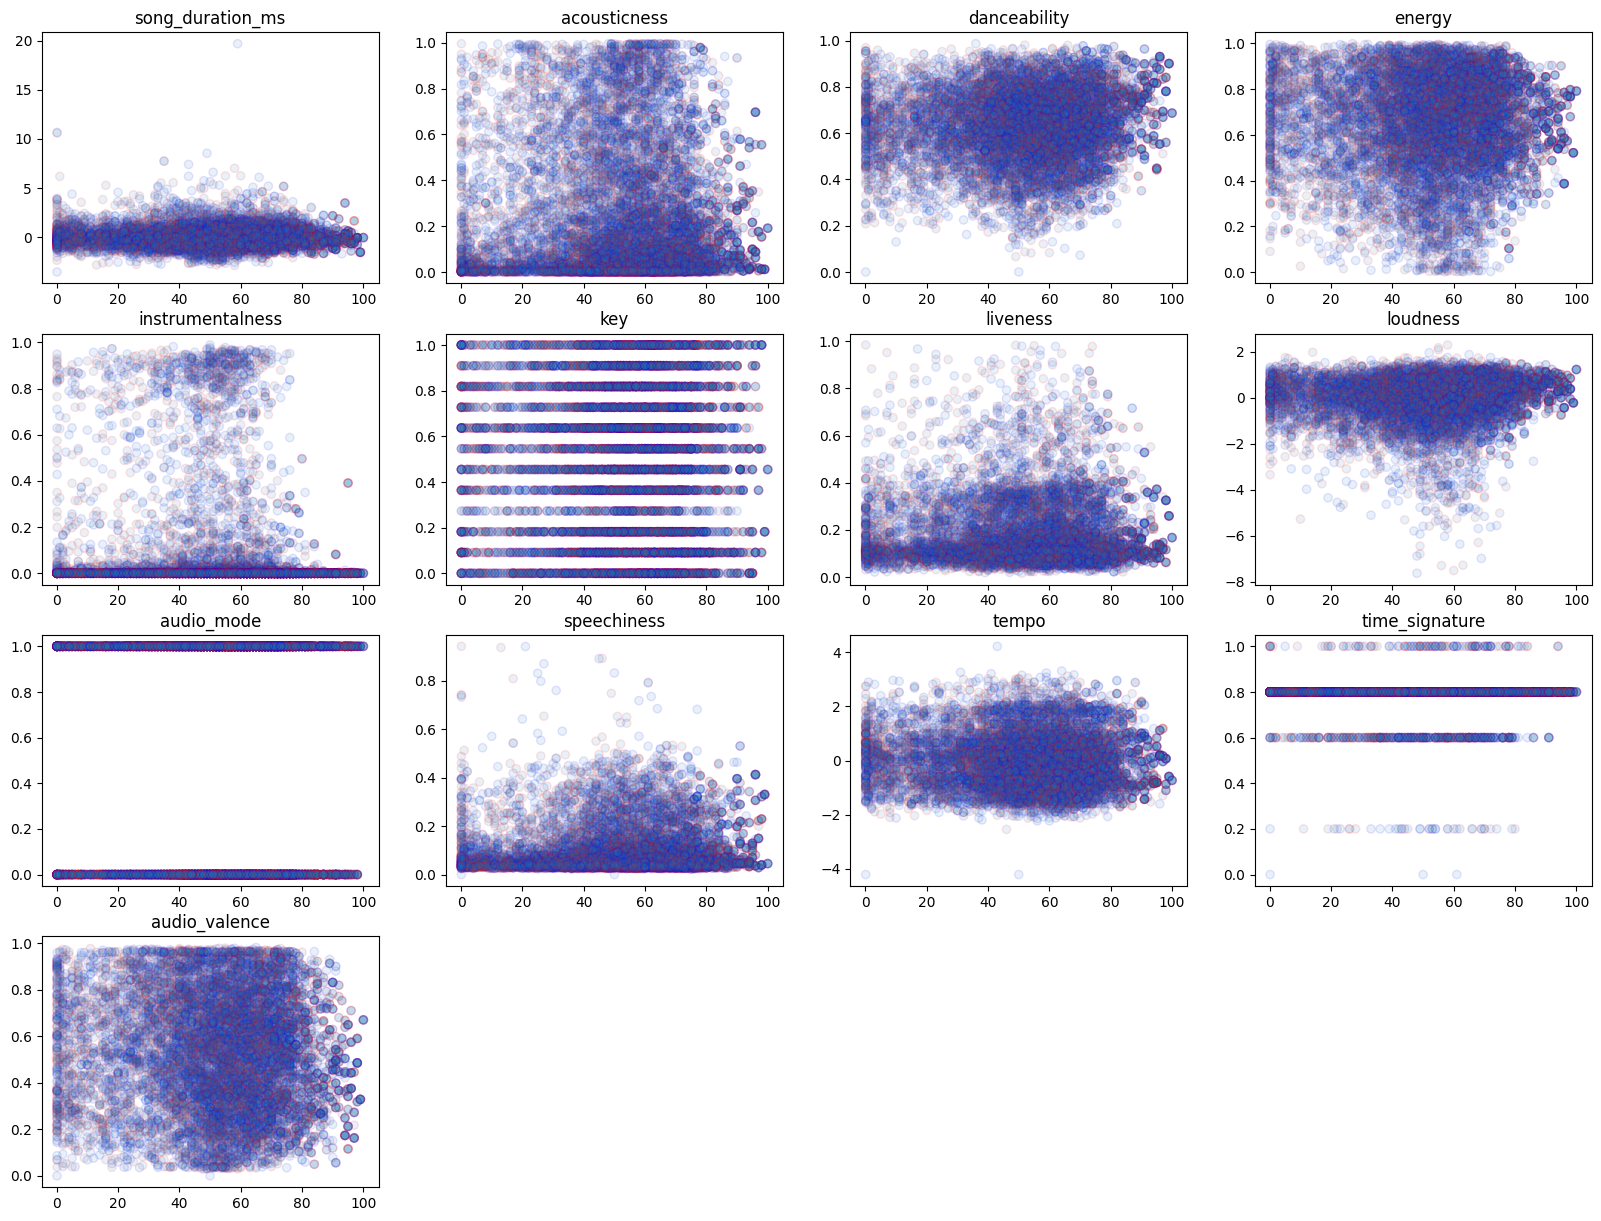

In [7]:
plt.figure( figsize=(20, 15) )
data = df_X_train.columns.tolist()
for d in range( len(data) ):
    plt.subplot( 4, 4, d+1 )
    plt.scatter( df_y_train, df_X_train.loc[:, data[d] ], alpha=0.1, edgecolors=['r','b'] )
    plt.title( data[d] )

# 2.0 - Decision Tree 

Parameters:
* max_depth

## 2.1 - Performance for Train Dataset

In [15]:
# definition
model_dt_train = DecisionTreeRegressor( random_state=77 )

# training
model_dt_train.fit( df_X_train, df_y_train )

# performance
y_pred_train = model_dt_train.predict( df_X_train )

# performance metrics
r2_train = mt.r2_score( df_y_train, y_pred_train )
mse_train = mt.mean_squared_error( df_y_train, y_pred_train )
rmse_train = mt.mean_squared_error( df_y_train, y_pred_train, squared=False )
mae_train = mt.mean_absolute_error( df_y_train, y_pred_train )
mape_train = mt.mean_absolute_percentage_error( df_y_train, y_pred_train )

print( f'Train R2: {r2_train:.7}' )
print( f'Train MSE: {mse_train:.7}' )
print( f'Train RMSE: {rmse_train:.7}' )
print( f'Train MAE: {mae_train:.7}' )
print( f'Train MAPE: {mape_train:.7}' )

Train R2: 0.9917567
Train MSE: 3.940403
Train RMSE: 1.985045
Train MAE: 0.2140985
Train MAPE: 0.08262787


## 2.2 - Performance for Validation Dataset

In [16]:
# Define
model_dt_val = DecisionTreeRegressor( random_state=77 )

# Training
model_dt_val.fit( df_X_train, df_y_train )

# Performance
y_pred_val = model_dt_val.predict( df_X_val )

# Performance Metrics
r2_val = mt.r2_score( df_y_val, y_pred_val )
mse_val = mt.mean_squared_error( df_y_val, y_pred_val )
rmse_val = mt.mean_squared_error( df_y_val, y_pred_val, squared=False)
mae_val = mt.mean_absolute_error(df_y_val, y_pred_val )
mape_val = mt.mean_absolute_percentage_error( df_y_val, y_pred_val )


print( f'Validation R2: {r2_val:.7}' )
print( f'Validation MSE: {mse_val:.7}' )
print( f'Validation RMSE: {rmse_val:.7}' )
print( f'Validation MAE: {mae_val:.7}' )
print( f'Validation MAPE: {mape_val:.7}' )

Validation R2: -0.2958891
Validation MSE: 618.8021
Validation RMSE: 24.87573
Validation MAE: 17.11522
Validation MAPE: 6.889324


## 2.3 - Hyperparamter Fine Tuning

In [17]:
max_depth = np.arange( 1, 41, 1 )

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [18]:
for i in max_depth:
    # Definition
    model_dt_tuning = DecisionTreeRegressor( random_state=77, max_depth=i )

    # training
    model_dt_tuning.fit( df_X_train, df_y_train )

    # performance
    y_pred_tuning = model_dt_tuning.predict( df_X_val )

    # performance metrics
    r2_tuning = mt.r2_score( df_y_val, y_pred_tuning )
    mse_tuning = mt.mean_squared_error( df_y_val, y_pred_tuning )
    rmse_tuning = mt.mean_squared_error( df_y_val, y_pred_tuning, squared=False )
    mae_tuning = mt.mean_absolute_error( df_y_val, y_pred_tuning )
    mape_tuning = mt.mean_absolute_percentage_error( df_y_val, y_pred_tuning )

    r2_list.append( r2_tuning )
    mse_list.append( mse_tuning )
    rmse_list.append( rmse_tuning )
    mae_list.append( mae_tuning )
    mape_list.append( mape_tuning )

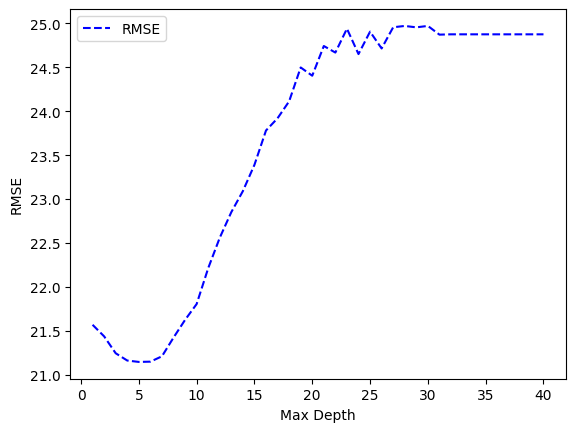

In [19]:
plt.plot( max_depth, rmse_list, 'b--', label='RMSE')
plt.xlabel( 'Max Depth' )
plt.ylabel('RMSE')
plt.legend();

In [20]:
best_depth = max_depth[ np.argmin(rmse_list) ]
best_depth

5

## 2.4 - Performance for Test Dataset

In [21]:
# define
model_dt_test = DecisionTreeRegressor( random_state=77, max_depth=best_depth )

# training
model_dt_test.fit( np.concatenate( (df_X_train, df_X_val )), np.concatenate(( df_y_train, df_y_val ))
                 )

# performance
y_pred_test = model_dt_test.predict( df_X_test )

# performance metrics
r2_test = mt.r2_score( df_y_test, y_pred_test )
mse_test = mt.mean_squared_error( df_y_test, y_pred_test )
rmse_test = mt.mean_squared_error( df_y_test, y_pred_test, squared=False )
mae_test = mt.mean_absolute_error( df_y_test, y_pred_test )
mape_test = mt.mean_absolute_percentage_error( df_y_test, y_pred_test )


print( f'Test R2: {r2_test:}' )
print( f'Test MSE: {mse_test:}' )
print( f'Test RMSE: {rmse_test:}' )
print( f'Test MAE: {mae_test:}' )
print( f'Test MAPE: {mape_test:}')



Test R2: 0.09047547149696622
Test MSE: 442.84838052138286
Test RMSE: 21.043963042197703
Test MAE: 16.82978094998882
Test MAPE: 7.883226145162679
